<div style="background-color: #000000; padding: 22px; text-align: center; color: #FFFFFF; border-radius: 10px; max-width: 900px; margin: 0 auto;">
    <a href="https://www.kaggle.com/shahnawaj9" style="color: #4682b4;font-size: 28px;font-family: 'Trebuchet MS'; text-decoration: none;">
            <strong>Shah Nawaj</strong>
        </a><br>
     <em style="font-size: 16px;">(Birmingham, UK)</em>
</div>

# Set up and Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Step 1: Load and Inspect the Dataset

We'll start by loading the dataset and checking basic information like shape, data types, and a preview of the first few rows.


In [2]:
# Load data
df = pd.read_csv('/kaggle/input/diabetes-database/diabetes.csv')

# Basic info and preview
print("Dataset shape:", df.shape)
print("\nData types and non-null values:\n")
print(df.info())
print("\nFirst 5 rows of the dataset:\n")
print(df.head())


Dataset shape: (768, 9)

Data types and non-null values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First 5 rows of the dataset:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1 

# Step 2: Summary Statistics

We'll generate descriptive statistics for numerical columns to understand the central tendency, spread, and potential outliers in each feature.


In [3]:
# Summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 🧾 Step 2 Summary: Summary Statistics

In this step, we examined the **descriptive statistics** for all numerical features to understand their central tendencies and spreads.

#### 🔍 Key Observations:
- Features like **Glucose**, **BMI**, and **Age** show meaningful variation, with higher means and wider ranges.
- Some features, like **Insulin** and **SkinThickness**, have **very low minimum values (0)**, which we later checked as likely invalid in Step 3.
- **DiabetesPedigreeFunction** has a wide range but a low mean, indicating a **right-skewed distribution**.

#### ✅ Why This Is Important:
- Descriptive statistics provide a **baseline understanding** of the data:
  - **Mean** and **median** help identify skewness.
  - **Standard deviation** shows variability.
  - **Min/max** can point to outliers or data entry issues.
- This step is essential before any modeling or visualization because it helps **spot irregularities** and **decide on scaling, transformation, or imputation** methods.

It also helps you compare feature importance by examining their spread and potential relationship to the target variable.


# Step 3: Check for Invalid Zero Values

Some features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI cannot realistically be zero. We'll count how many zero values exist in these columns.


In [4]:
# Columns where zero values are biologically implausible
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_counts = (df[cols_with_zeros] == 0).sum()

print("Count of zeros in important medical features:\n")
print(zero_counts)

Count of zeros in important medical features:

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


### 🧾 Step 3 Summary: Checking for Invalid Zero Values

In this step, we checked for **zero values** in columns where a value of zero is **not biologically plausible**, such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI.

#### 🔍 Key Observations:
- Several features have a **significant number of zero values**:
  - **Insulin**, **SkinThickness**, and **BloodPressure** have many zeros.
  - Even **Glucose** and **BMI** — critical health indicators — contain zeros.

These likely represent **missing or unrecorded data**, not actual measurements.

#### ✅ Why This Is Important:
- These zero values can **skew the analysis** and **negatively impact model performance** if treated as valid values.
- We'll need to **handle them appropriately** in data preprocessing:
  - By **imputing** values using statistical methods (mean, median, or model-based)
  - Or potentially **removing** rows or columns with excessive missingness

Identifying these anomalies early allows us to **clean the dataset properly**, ensuring the quality and reliability of our insights and models.


# Step 4: Outcome Class Distribution

We’ll visualize how many patients are diabetic (`Outcome = 1`) vs non-diabetic (`Outcome = 0`).


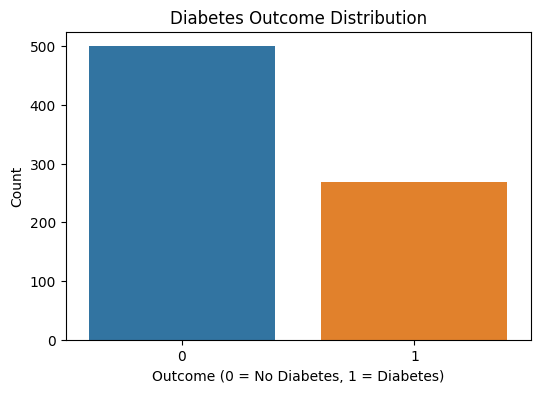

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Distribution')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

### 🧾 Step 4 Summary: Outcome Class Distribution

In this step, we visualized the distribution of the target variable `Outcome`, which indicates whether a person has diabetes (`1`) or not (`0`).

#### 🔍 Key Observations:
- The dataset is **not perfectly balanced**:
  - There are **more non-diabetic (0)** cases than diabetic (1).
  - This is a common situation in medical datasets where positive cases are fewer.

#### ✅ Why This Is Important:
- **Class imbalance** can lead to biased models that favor the majority class.
- It’s crucial to handle this imbalance properly during model training:
  - By using **balanced metrics** (e.g., F1-score, ROC-AUC instead of accuracy)
  - Through techniques like **oversampling**, **undersampling**, or **class weighting**.

Understanding the class distribution early helps guide our modeling strategy and ensures we evaluate model performance **fairly and effectively**.


# Step 5: Feature Distributions

Let's look at the distribution of each feature to understand its shape, skewness, and potential anomalies.



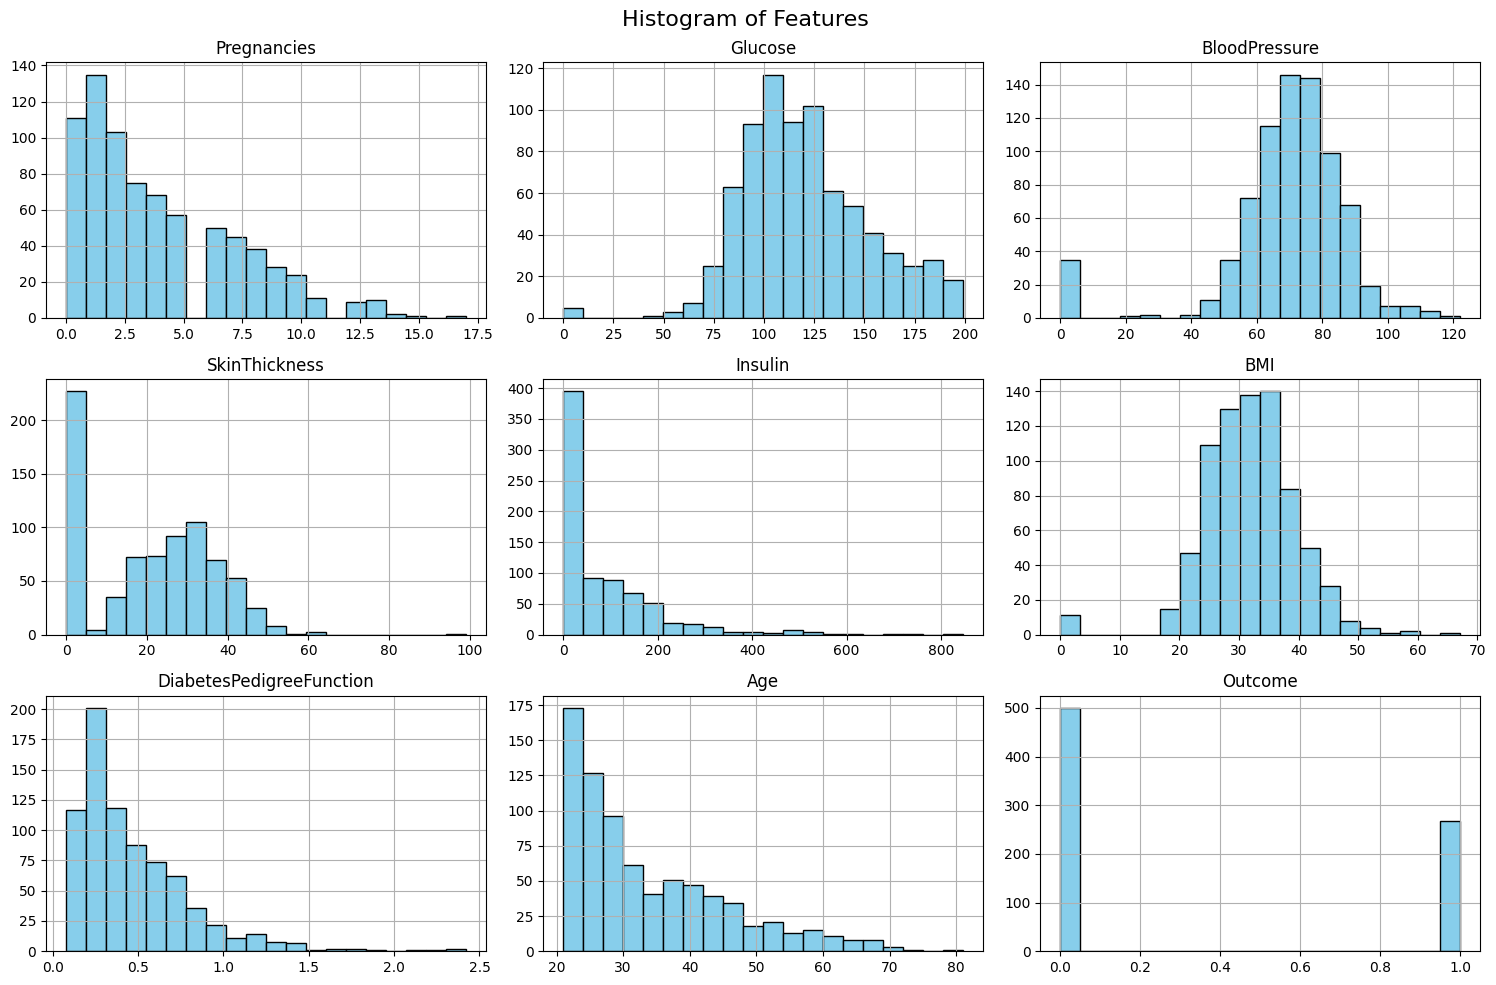

In [6]:
# Histograms for all columns
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histogram of Features', fontsize=16)
plt.tight_layout()
plt.show()

### 🧾 Step 5 Summary: Feature Distributions

By visualizing the distribution of each feature using histograms, we gain insight into the **shape, spread, and potential issues** in the data.

#### 🔍 Key Observations:
- Many features, like **Insulin**, **SkinThickness**, and **BloodPressure**, show a **right-skewed distribution** with a high number of zeros — likely indicating **missing or unrecorded values**.
- **Glucose**, **BMI**, and **Age** have a more continuous distribution but are also slightly skewed.
- **DiabetesPedigreeFunction** is right-skewed, which may benefit from transformation (e.g., log scale) in later steps.

#### ✅ Why This Is Important:
- Helps **identify skewness**, which can affect model assumptions (especially for linear models).
- Shows **possible missing values** hidden as zeros, which we’ll need to **handle during data cleaning**.
- Gives an idea of **outliers or extreme values** that may need treatment (e.g., scaling, capping).
- Understanding distribution helps guide **feature engineering and preprocessing strategies**.

This step sets the foundation for data cleaning and model preparation by highlighting what might need to be fixed or transformed.


# Step 6: Correlation Heatmap

This heatmap shows how features are correlated with one another and with the target variable `Outcome`. High correlations may indicate useful predictive power.


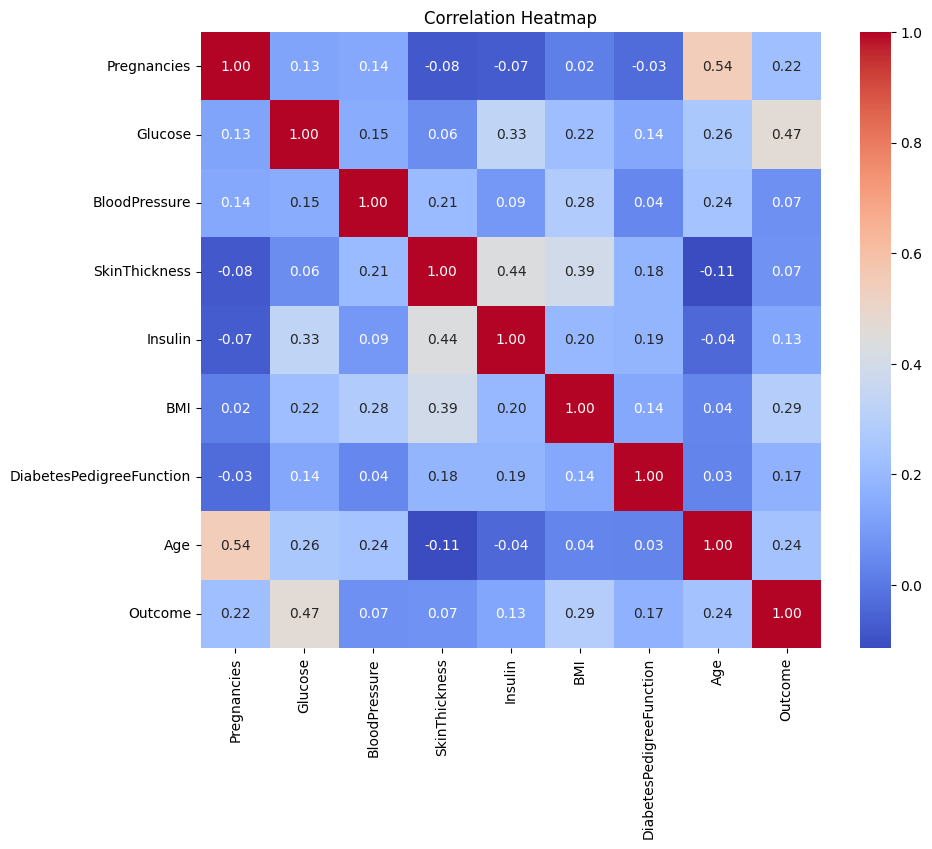

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 🧾 Step 6 Summary: Correlation Analysis

The correlation heatmap helps us understand the **linear relationships** between the features and the target variable (`Outcome`), as well as among the features themselves.

#### 🔍 Key Observations:
- **Glucose** has the **strongest positive correlation** with `Outcome`, suggesting it's a key predictor of diabetes.
- **BMI**, **Age**, and **DiabetesPedigreeFunction** also show **moderate positive correlations** with diabetes.
- Most of the other features have relatively **low correlations** with each other, which is good — it means **less multicollinearity** in the dataset.

#### ✅ Why This Is Important:
- Features with strong correlation to `Outcome` are likely to be **important inputs** in our predictive models.
- Identifying **redundant or highly correlated features** helps avoid issues like multicollinearity, especially for models like **logistic regression**.
- This analysis informs our decisions in **feature selection** and **model interpretation**.

Overall, this step gives us an initial sense of which features may carry the most signal for predicting diabetes.


# Step 7: Feature Comparison by Outcome

We’ll use boxplots to compare feature values for diabetic vs non-diabetic groups. This helps identify features that differ significantly across outcomes.


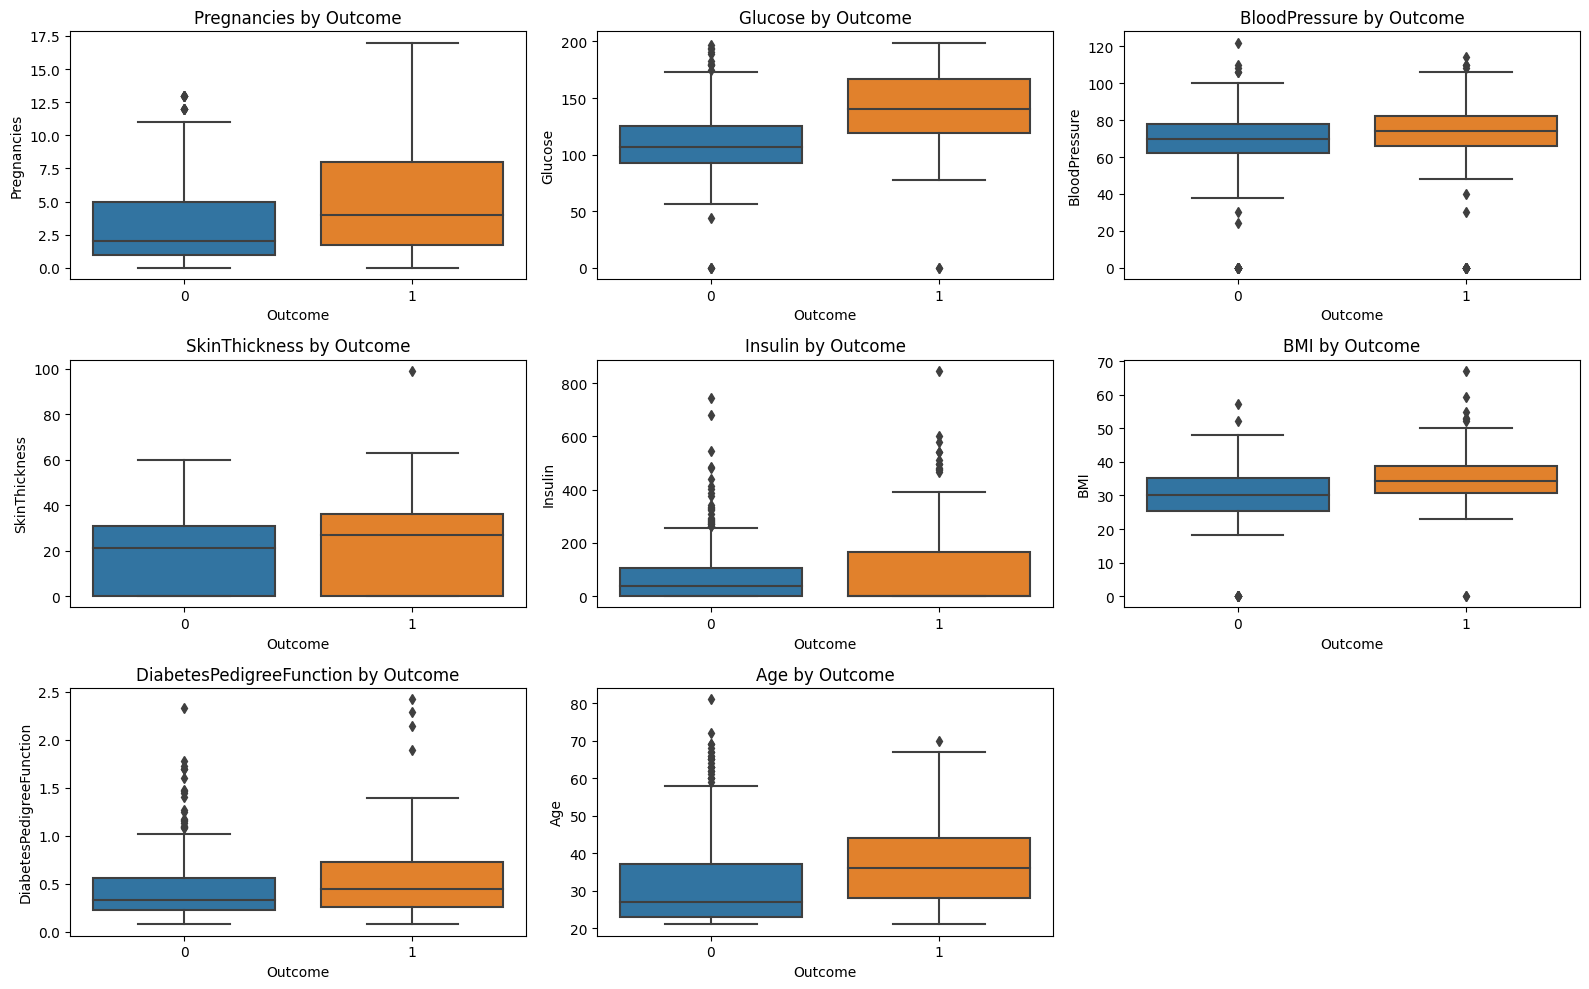

In [8]:
# Boxplots grouped by Outcome
plt.figure(figsize=(16, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'{column} by Outcome')
plt.tight_layout()
plt.show()


### 🧾 Step 7 Summary: Feature Comparison by Outcome

From the boxplots, we can visually compare the distribution of each feature for diabetic (`Outcome = 1`) vs non-diabetic (`Outcome = 0`) individuals.

#### 🔍 Key Observations:
- **Glucose and BMI** tend to be **higher** in diabetic patients.
- **Insulin** and **SkinThickness** also show differences, but they have many zero values which might indicate missing data.
- **Age** and **DiabetesPedigreeFunction** are slightly higher in diabetics, but with more overlap between classes.
- **BloodPressure** shows less variation between the two groups, possibly indicating it may be a weaker predictor.

#### ✅ Why This Is Important:
This step helps us **identify features that are most relevant** for predicting diabetes. Features that show **clear separation** between classes are more likely to be useful in training accurate machine learning models. It also helps us detect **skewed or noisy data**, which can influence model performance.

In the next steps, we can use these insights to:
- **Select important features**
- **Handle missing/zero values**
- **Engineer new features or transformations**



<div style="background-color: #000000; padding: 20px; text-align: center; color: #FFFFFF; border-radius: 10px; max-width: 900px; margin: 0 auto;">
    <span style="font-size: 26px; font-weight: bold;">✨ 🧼 Data Cleaning & Preprocessing ✨</span>
</div>

### 🧼 Data Cleaning: Handling Invalid Zero Values

During EDA, we identified that several features contain **zero values that are biologically implausible**, such as `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI`.

These zeros likely represent **missing or unrecorded data**. To address this:

#### 🔧 Cleaning Strategy:
- We **replace zeros with `NaN`** in the affected columns.
- Then, we **impute the missing values using the median** of each feature.
  - Median is used instead of mean because it is **more robust to outliers** and skewed data.

This step ensures the dataset is **clean and ready for modeling** without introducing bias from missing values.

In [9]:
# Make a copy of the original data
df_clean = df.copy()

# Columns to clean
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN
df_clean[columns_to_impute] = df_clean[columns_to_impute].replace(0, np.nan)

# Impute NaNs with median values of each column
for col in columns_to_impute:
    median = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median)

# Check if any NaNs remain
print("Remaining missing values:\n", df_clean.isnull().sum())


Remaining missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### 🧾 Step 2: Feature Scaling (Standardization)

After cleaning the data, we applied **feature scaling** to ensure that all input features are on the **same scale**. This is crucial for models that are sensitive to feature magnitude (e.g., Logistic Regression, KNN, SVM).


In [10]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the cleaned dataset
df_scaled = df_clean.copy()

# Features to scale (exclude the target 'Outcome')
features = df_scaled.columns.drop('Outcome')

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df_scaled[features] = scaler.fit_transform(df_scaled[features])

# Preview the scaled data
df_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


# The scaled data is now ready for **model training**.

<div style="background-color: #000000; padding: 20px; text-align: center; color: #FFFFFF; border-radius: 10px; max-width: 900px; margin: 0 auto;">
    <span style="font-size: 26px; font-weight: bold;">✨ Train-Test Split ✨</span>
</div>

🎯 Why we do this:
To fairly evaluate model performance, we need to train the model on one part of the data and test it on another (unseen) part. This helps us avoid overfitting and gives a realistic picture of how well the model will generalize.

In [11]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the shape of the splits
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (614, 8)
Test set: (154, 8)


### 🧾  Train-Test Split

To evaluate our model's performance fairly, we split the dataset into **training** and **testing** sets.

#### 🎯 Purpose:
- The **training set** is used to train the machine learning model.
- The **test set** is used to evaluate how well the model performs on **unseen data**.
- This helps prevent **overfitting** and gives a more accurate picture of real-world performance.

#### ⚙️ Method:
- We used `train_test_split` from `sklearn.model_selection`.
- The data was split **80% for training** and **20% for testing**.
- We used `stratify=y` to ensure the class distribution (diabetic vs. non-diabetic) remains consistent across both sets.

#### ✅ Result:
Now we have:
- `X_train`, `y_train` for model training
- `X_test`, `y_test` for model evaluation

This step prepares us for the next phase: **model training and evaluation**.


<div style="background-color: #000000; padding: 20px; text-align: center; color: #FFFFFF; border-radius: 10px; max-width: 900px; margin: 0 auto;">
    <span style="font-size: 26px; font-weight: bold;">✨Model Training 🎯 ✨</span>
</div>

# Model 1: Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔍 Accuracy: 0.7077922077922078

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


🧩 Confusion Matrix:
 [[82 18]
 [27 27]]


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate performance
print("🔍 Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


🔍 Accuracy: 0.7792207792207793

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154


🧩 Confusion Matrix:
 [[88 12]
 [22 32]]


# 🔍  Compare Logistic Regression vs Random Forest

Logistic Regression Accuracy: 0.7078
Random Forest Accuracy:      0.7792


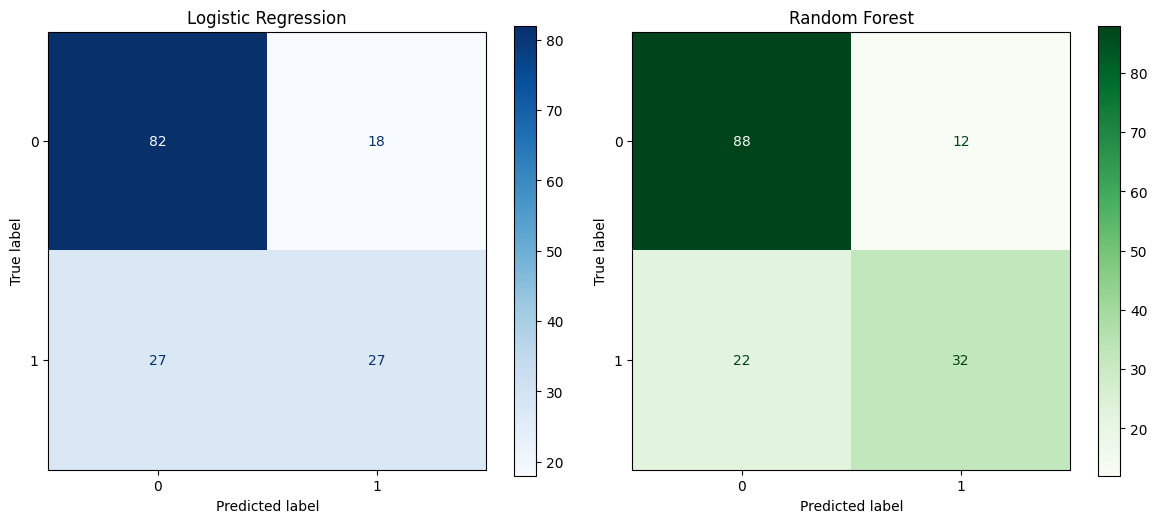

In [14]:
# Compare Accuracy
logreg_acc = accuracy_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {logreg_acc:.4f}")
print(f"Random Forest Accuracy:      {rf_acc:.4f}")

# Optionally compare confusion matrices
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression")

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1], cmap='Greens')
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()


### 🔍 Model Comparison: Logistic Regression vs Random Forest

After training both Logistic Regression (baseline) and Random Forest models, we compared their performance on the same test set.

#### ⚖️ What We Compared:
- **Accuracy**: Overall correctness of predictions.
- **Confusion Matrix**: Distribution of true positives, false positives, true negatives, and false negatives.
- **Classification Metrics** (Precision, Recall, F1-Score) from earlier steps.

#### 📊 Key Takeaways:
- **Logistic Regression** is simple, interpretable, and performs reasonably well.
- **Random Forest** usually improves accuracy and recall by capturing more complex patterns.
- Confusion matrices help visualize where each model is making errors — such as false negatives, which are critical in medical predictions like diabetes.

#### ✅ Why This Comparison Matters:
- It helps determine if the added complexity of a model like Random Forest **translates into real performance gains**.
- By understanding trade-offs between models, we can choose one that balances **accuracy**, **interpretability**, and **computational cost**.

This comparison guides model selection and can inform further steps like **hyperparameter tuning** or **model ensembling**.


# Feature Importance (Random Forest)

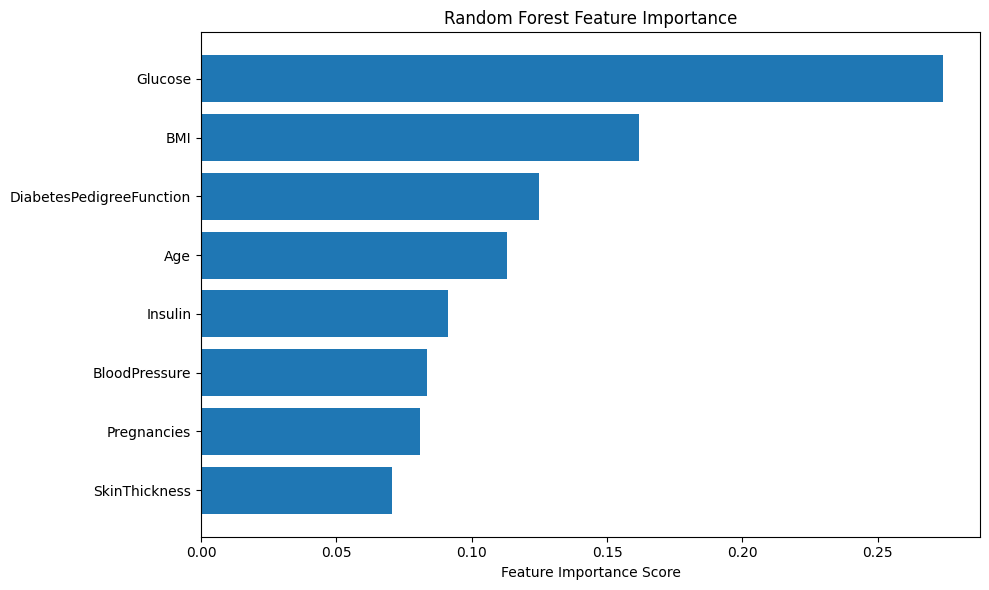

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = rf.feature_importances_

# Map to feature names
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance Score")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 🧾  Feature Importance (Random Forest)

Using the trained Random Forest model, we extracted and visualized the **importance of each feature** in predicting diabetes.

#### 📊 Key Takeaways:
- **Glucose** and **BMI** are often among the top predictors — consistent with medical research.
- Features like **Age**, **DiabetesPedigreeFunction**, and **Insulin** also contribute, but to varying degrees.
- Helps us understand what the model "looks at" when making predictions.

#### ✅ Why It’s Useful:
- Improves model transparency.
- Helps in feature selection or reduction for simpler models.
- Makes it easier to explain results to non-technical stakeholders (e.g., clinicians, decision-makers).


<div style="background-color: #000000; padding: 20px; text-align: center; color: #FFFFFF; border-radius: 10px; max-width: 900px; margin: 0 auto;">
    <span style="font-size: 26px; font-weight: bold;">✨Thank You ✨</span>
    <div style="text-align: center;">
Thank you for taking the time to explore my notebook! I truly appreciate your interest and feedback.<br>
Please don’t hesitate to <strong>share your comments or suggestions</strong>: your input is invaluable!<br>
If you found this notebook helpful, consider giving it an <strong>upvote</strong> to show your support—it means a lot to me!<br>
Best of luck with your data analysis adventures. Keep exploring and discovering new insights!
</div>

</div>